# Importing Dependencies

In [1]:
#Importing libraries
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SKL learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz  
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import tree

# try:
#     # See #1137: this allows compatibility for scikit-learn >= 0.24
#     from sklearn.utils import safe_indexing
# except ImportError:
#     from sklearn.utils import _safe_indexing

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz

In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [4]:
#Installing yellow brick for model
# !pip install yellowbrick
# import warnings
# warnings.filterwarnings("ignore")

In [5]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Gathering all our key indicators for a merge

In [6]:
#Final CSV
final_indicator = pd.read_csv("../data/output/suicide_roc.csv")

In [7]:
final_indicator.head()

,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,health_pct,population,unemployment
0,-0.011161,-0.009874,0.008576,-0.014285,-0.031137,0.062740,-0.053173,0.047790,0.000000
1,-0.008353,-0.009467,0.008748,-0.015660,-0.032511,0.108548,0.096990,0.044163,-0.005993
2,-0.016990,-0.007921,0.008966,-0.017228,-0.034087,0.144995,0.014255,0.037514,-0.007752
3,-0.010994,-0.006120,0.009195,-0.019073,-0.035789,0.089667,0.067798,0.030357,-0.015625
4,-0.013982,-0.005450,0.009333,-0.021108,-0.037118,0.363850,-0.067599,0.025252,-0.014109


In [8]:
#Making sure all our dtypes are correct
final_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   suicide_rate_owid           2895 non-null   float64
 1   mental_substance_disorders  2895 non-null   float64
 2   life_expectancy             2895 non-null   float64
 3   birth_rate                  2895 non-null   float64
 4   death_rate                  2895 non-null   float64
 5   gdp                         2895 non-null   float64
 6   health_pct                  2895 non-null   float64
 7   population                  2895 non-null   float64
 8   unemployment                2895 non-null   float64
dtypes: float64(9)
memory usage: 203.7 KB


In [9]:
final_indicator.describe()

,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,health_pct,population,unemployment
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,-0.010070,-0.000695,0.005352,-0.009694,-0.009642,0.071781,0.015875,0.015406,0.004385
std,0.029292,0.001822,0.005952,0.021610,0.023843,0.135828,0.109649,0.016162,0.184757
min,-0.169668,-0.011381,-0.035607,-0.138686,-0.133333,-0.640223,-0.443989,-0.037746,-0.805556
25%,-0.022753,-0.001430,0.002200,-0.018552,-0.024093,0.005297,-0.030541,0.005205,-0.057515
50%,-0.008738,-0.000362,0.003879,-0.011374,-0.008348,0.063201,0.006622,0.013557,-0.006925
75%,0.002169,0.000322,0.006925,-0.002873,0.004373,0.138901,0.048805,0.024310,0.037356
max,0.413126,0.007115,0.044550,0.144928,0.098361,1.884354,1.478131,0.191392,5.812500


# Initial Correlation

In [10]:
indicator_correlation= final_indicator.corr()
indicator_correlation2= indicator_correlation["suicide_rate_owid"]

print("Display items with correlation coefficient of 0.3 or more and -0.3 or less")
# Get values with a correlation coefficient of 0.2 or more and -0.2 or less
target_cc_value = 0.1

print("Positive correlation")
display(indicator_correlation2[indicator_correlation2 >= target_cc_value])
print("Negative correlation")
display(indicator_correlation2[indicator_correlation2 <= (-1*target_cc_value)])

Display items with correlation coefficient of 0.3 or more and -0.3 or less
Positive correlation


suicide_rate_owid             1.000000
mental_substance_disorders    0.146587
death_rate                    0.187283
Name: suicide_rate_owid, dtype: float64

Negative correlation


life_expectancy   -0.188927
Name: suicide_rate_owid, dtype: float64

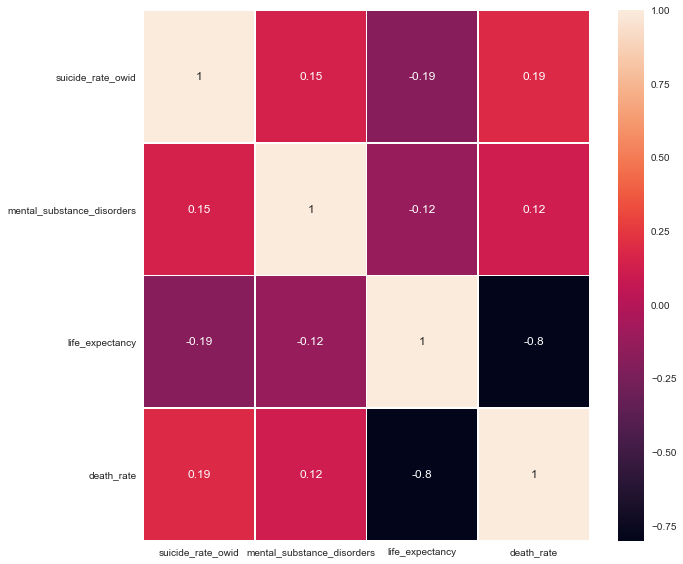

In [11]:
index_df = indicator_correlation[(indicator_correlation["suicide_rate_owid"] >= target_cc_value) | (indicator_correlation["suicide_rate_owid"] <= (-1 * target_cc_value))].index
df_target=indicator_correlation.loc[index_df,index_df]
plt.figure(figsize=(10, 8)) #heatmap size
sns.heatmap(df_target, annot=True, linewidths=.5)
plt.tight_layout()
plt.show()
#Saving our plot
#plt.savefig("static/images/initial_correlation.png", bbox_inches = "tight")

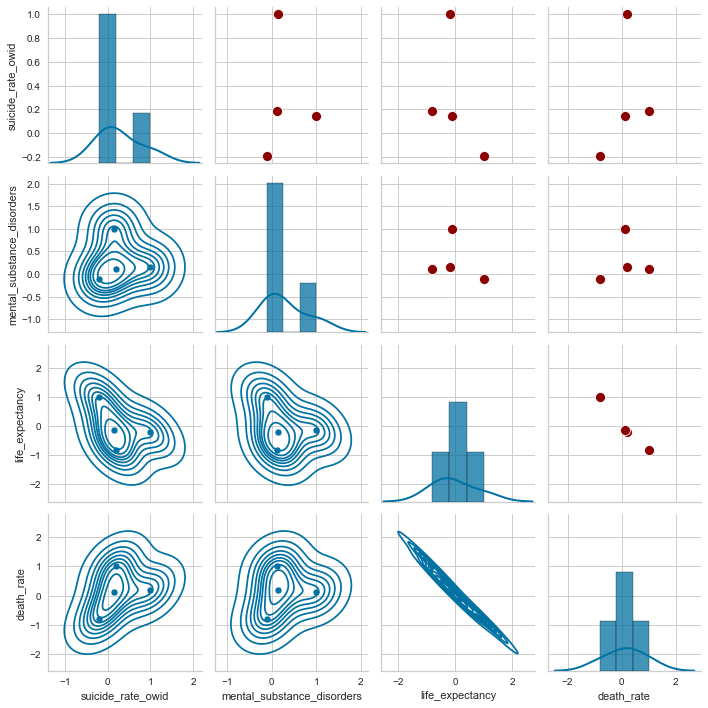

In [12]:
#Scatterplot with our correlations
g = sns.pairplot(df_target)
g.map_upper(sns.scatterplot, s=100,color = 'darkred')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.tight_layout()
plt.show()
#Saving our scatterplot
#plt.savefig("static/images/correlation_scatter.png", bbox_inches = "tight")

# Linear Regresion

In [13]:
# prepare the data
# linear_data=final_indicator.drop("year",axis=1)
# df = linear_data.groupby(['country']).mean()
# clean_linear=df.dropna().reset_index()

clean_linear = final_indicator
clean_linear.head()

,suicide_rate_owid,mental_substance_disorders,life_expectancy,birth_rate,death_rate,gdp,health_pct,population,unemployment
0,-0.011161,-0.009874,0.008576,-0.014285,-0.031137,0.062740,-0.053173,0.047790,0.000000
1,-0.008353,-0.009467,0.008748,-0.015660,-0.032511,0.108548,0.096990,0.044163,-0.005993
2,-0.016990,-0.007921,0.008966,-0.017228,-0.034087,0.144995,0.014255,0.037514,-0.007752
3,-0.010994,-0.006120,0.009195,-0.019073,-0.035789,0.089667,0.067798,0.030357,-0.015625
4,-0.013982,-0.005450,0.009333,-0.021108,-0.037118,0.363850,-0.067599,0.025252,-0.014109


In [14]:
#Selecting our focus feature (columns)
y = clean_linear["suicide_rate_owid"].values
data = clean_linear.drop("suicide_rate_owid",axis =1)   #.drop("population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns                                             
                                                

Index(['life_expectancy', 'birth_rate', 'death_rate', 'gdp', 'health_pct',
       'population', 'unemployment'],
      dtype='object')

In [15]:
# Creating the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Training the Model (Linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_train
X_test
y_train

array([[-0.02021809],
       [ 0.04265453],
       [-0.01025099],
       ...,
       [-0.00757263],
       [-0.03689906],
       [-0.05931809]])

In [17]:
#Checking the model coefficient
print(model.coef_)

[[ 1.89526612e+00 -3.14541795e-01 -4.50978184e-02  2.17316908e-01
  -1.89796983e-04 -3.00572168e-04  2.06848035e-01  3.58252095e-03]]


In [18]:
#Checking our model intercept
print(model.intercept_)

[-0.00901291]


In [19]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.06487984027546811
Testing Score: 0.04915427513155979


In [20]:
# Model Accuracy (also low, flop)
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.049


Text(0.5, 1.0, 'Residual Plot')

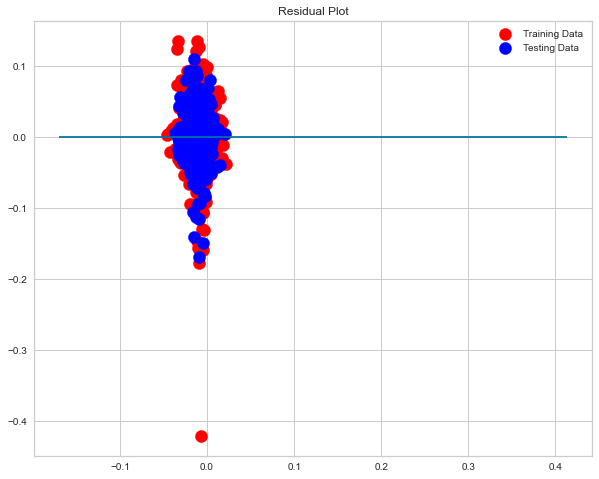

In [21]:
# create a polt on the training and test scores
plt.figure(figsize=(10, 8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red",s=150, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="blue",s=150, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#Saving our residual plot from linear regression
#plt.savefig("static/images/Linear_residualplot.png", bbox_inches = "tight")

In [22]:
#getting predictions
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 0.0007460658255314844, R2: 0.04915427513155979, MAE: 0.01847492221368178


In [23]:
# getting importance
importance = model.coef_[0]
# for loop to enumaret importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1.89527
Feature: 1, Score: -0.31454
Feature: 2, Score: -0.04510
Feature: 3, Score: 0.21732
Feature: 4, Score: -0.00019
Feature: 5, Score: -0.00030
Feature: 6, Score: 0.20685
Feature: 7, Score: 0.00358


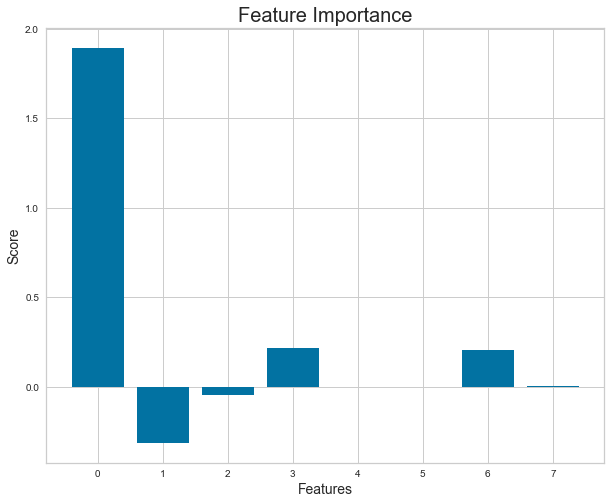

In [24]:
# ploting feature importance
plt.figure(figsize=(10, 8))
plt.bar([x for x in range(len(importance))], importance)
# Plot the data 
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
plt.show()
#Saving our feature importance
#plt.savefig("images/linear_reg_featureimp.png", bbox_inches = "tight")

# SVR Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [26]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [27]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -0.3901860777815773
Testing Score: -0.6574555206324033


In [28]:
y_pred=regressor.predict(X_test)

In [29]:
predictions = regressor.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = regressor.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 0.0013805326304966025, R2: -0.6574555206324033, MAE: 0.027534242035254775


In [30]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.070


# Logistic Regression

We used as dependent variable ("suicide_rate_owid_, in two groups (increase and decrease) established the base value as (0.00). Any suicide rate equal or greater than that value would be considered "increase" and below that value would be considered a "decrease".

In [31]:
data = clean_linear.drop("suicide_rate_owid",axis =1)   #.drop("population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns
y = clean_linear["suicide_rate_owid"]
def score(i):
    if i < 0: return "Decrease"
    if i >= 0: return "Increase"
li = map(lambda x: "{1}".format(x, score(x)), y)
y2=[]
for i in li:
    y2.append(i)

C:\Users\rpmcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'mental_substance_disorders\n suicide_rate_owid rate')

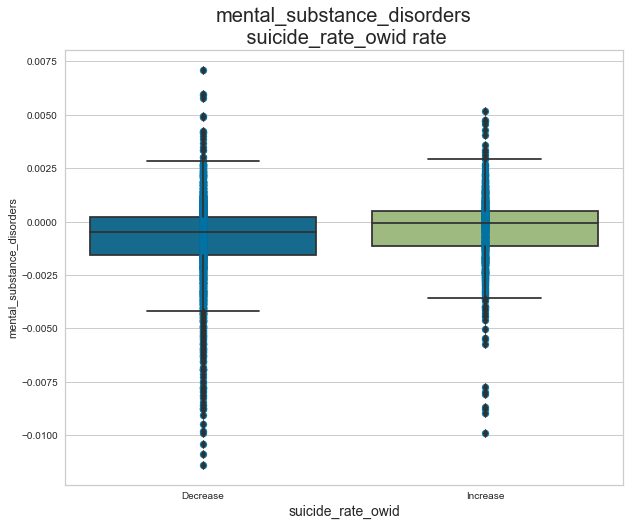

In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean_linear['mental_substance_disorders'])
plt.scatter(y2,clean_linear['mental_substance_disorders'])
plt.xlabel("suicide_rate_owid",fontsize = 14)
plt.title("mental_substance_disorders\n suicide_rate_owid rate",fontsize = 20)
#Saving our visualization
#plt.savefig("static/images/Mentalsub_SuicideRate.png", bbox_inches = "tight")

C:\Users\rpmcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Unemployment\n suicide_rate_owid rate')

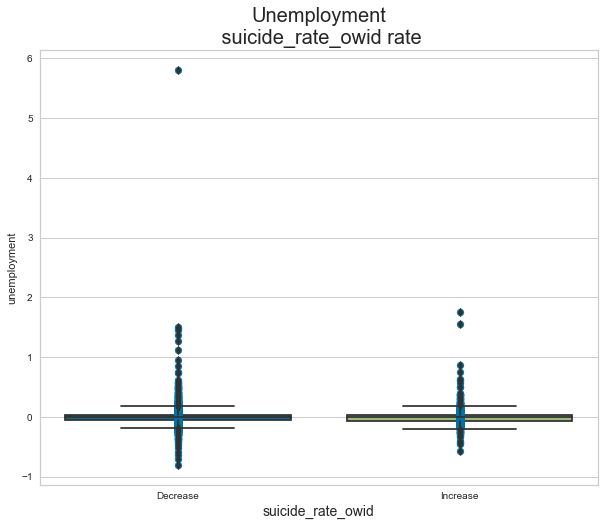

In [33]:
plt.figure(figsize=(10, 8))
sns.boxplot(y2,clean_linear['unemployment'])
plt.scatter(y2,clean_linear['unemployment'])
plt.xlabel("suicide_rate_owid",fontsize = 14)
plt.title("Unemployment\n suicide_rate_owid rate",fontsize = 20)
#Saving our viz
#plt.savefig("static/images/Unemployment_SuicideRate.png", bbox_inches = "tight")

In [34]:
norm=pd.get_dummies(y2, drop_first = False)
norm_y=norm["Increase"]
norm_y=pd.DataFrame(norm_y)

In [35]:
norm_y.head()

,Increase
0,0
1,0
2,0
3,0
4,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [39]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7147087857847977
Testing Data Score: 0.7042577675489068


In [40]:
predictions = model.predict(X_test)

In [41]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：70.43%
Recall：0.00%
Precision：0.00%
F1：0.00%


C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       612
           1       0.00      0.00      0.00       257

    accuracy                           0.70       869
   macro avg       0.35      0.50      0.41       869
weighted avg       0.50      0.70      0.58       869



C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


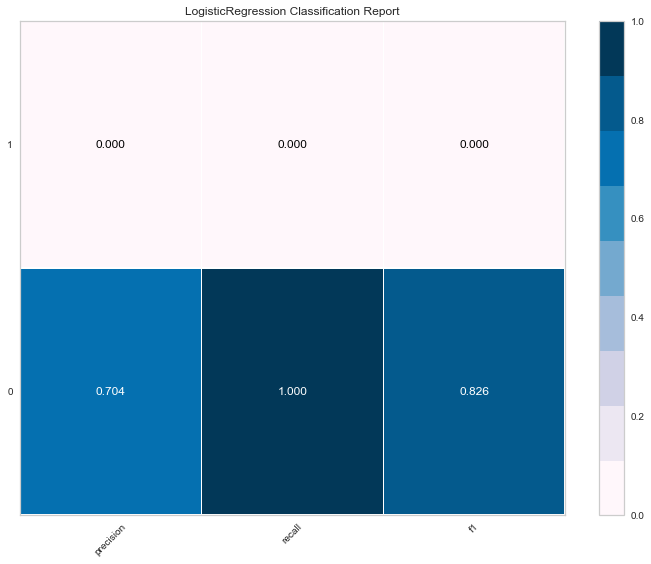

In [43]:
plt.figure(figsize=(10,8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving our visualization
#viz.show(outpath="static/images/logistic_noclassifier.png")

Feature: 0, Score: 0.19371
Feature: 1, Score: -0.78089
Feature: 2, Score: -0.24291
Feature: 3, Score: 3.18092
Feature: 4, Score: -0.12678
Feature: 5, Score: 0.17453
Feature: 6, Score: -0.17417
Feature: 7, Score: 0.04443


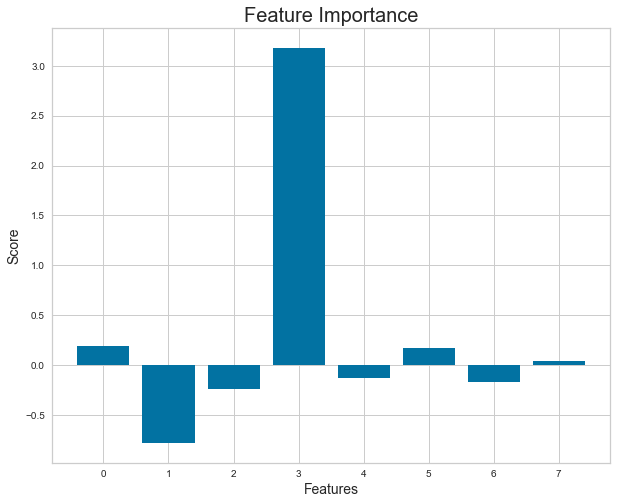

In [44]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10, 8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
plt.show()
#Saving our feature importance
#plt.savefig("static/images/log_featureimportance.png", bbox_inches = "tight")

In [45]:
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [46]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l1; total time=   0.0s
[CV 1/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 2/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 3/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 4/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 5/5] END ................................C=1, penalty=l2; total time=   0.0s
[CV 1/5] END ................................C=5, penalty=l1; total time=   0.0s
[CV 2/5] END ................................C=5,

C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\model_selection\_v

[CV 2/5] END ...............................C=10, penalty=l2; total time=   0.0s
[CV 3/5] END ...............................C=10, penalty=l2; total time=   0.0s
[CV 4/5] END ...............................C=10, penalty=l2; total time=   0.0s
[CV 5/5] END ...............................C=10, penalty=l2; total time=   0.0s


C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.71470899        nan 0.71470899        nan 0.71471143]
  warnings.w

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [47]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.7147114273551055


In [48]:
# Training score:
grid.score(X_train, y_train)

0.717670286278381

In [49]:
# Testing score:
grid.score(X_test, y_test)

0.7054085155350979

C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


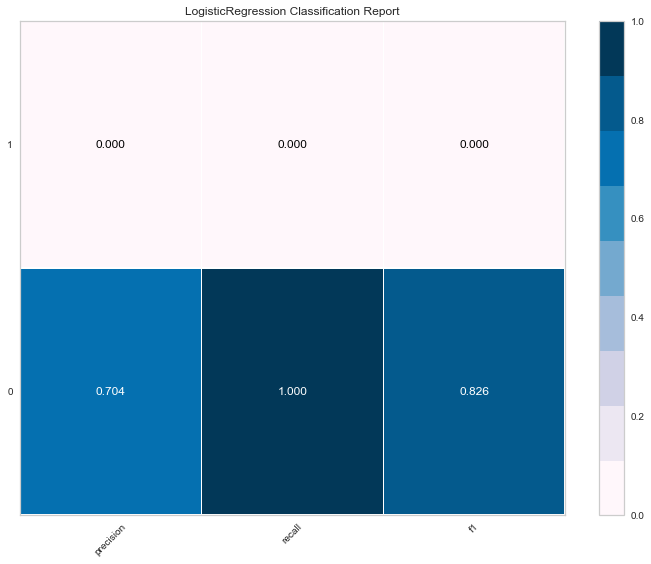

In [50]:
plt.figure(figsize=(10, 8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving the viz
#viz.show(outpath="static/images/log_classifier.png")

In [51]:
#Generating our train and test
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

# Random Forest 

In [52]:
#Scalling the data
# X_scaler = MinMaxScaler().fit(X_train)

# X_train = X_scaler.transform(X_train)
# X_test = X_scaler.transform(X_test)

In [53]:
print(X_train.shape)
print(y_train.shape)

(2026, 8)
(2026, 1)


In [54]:
#Defining our classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [55]:
#Getting our training and test score
print(f"Training Data Score: {randomforest.score(X_train, y_train)}")
print(f"Testing Data Score: {randomforest.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7364787111622555


In [56]:
#Setting our feature importance
sorted(zip(randomforest.feature_importances_, x_columns), reverse=True)

[(0.1425099669309519, 'gdp'),
 (0.14148782900061493, 'life_expectancy'),
 (0.1377618979524536, 'birth_rate'),
 (0.12628751435709054, 'unemployment'),
 (0.11972455455795027, 'health_pct'),
 (0.11467458351548858, 'death_rate'),
 (0.11153272365170293, 'population')]

In [57]:
#Defining the grid fit
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(randomforest, param_grid, verbose=3)

In [58]:
#Starting our grid fit
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 2/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 3/5] END ................max_depth=125, n_estimators=250; total time=   0.7s
[CV 4/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 5/5] END ................max_depth=125, n_estimators=250; total time=   0.6s
[CV 1/5] END ................max_depth=125, n_estimators=300; total time=   0.8s
[CV 2/5] END ................max_depth=125, n_estimators=300; total time=   0.8s
[CV 3/5] END ................max_depth=125, n_estimators=300; total time=   0.8s
[CV 4/5] END ................max_depth=125, n_estimators=300; total time=   0.8s
[CV 5/5] END ................max_depth=125, n_estimators=300; total time=   0.8s
[CV 1/5] END ................max_depth=125, n_estimators=350; total time=   0.9s
[CV 2/5] END ................max_depth=125, n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [59]:
# Making the predictions
predictions = grid.predict(X_test)

In [60]:
#making the clasification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       612
           1       0.63      0.20      0.30       257

    accuracy                           0.73       869
   macro avg       0.68      0.57      0.57       869
weighted avg       0.71      0.73      0.67       869



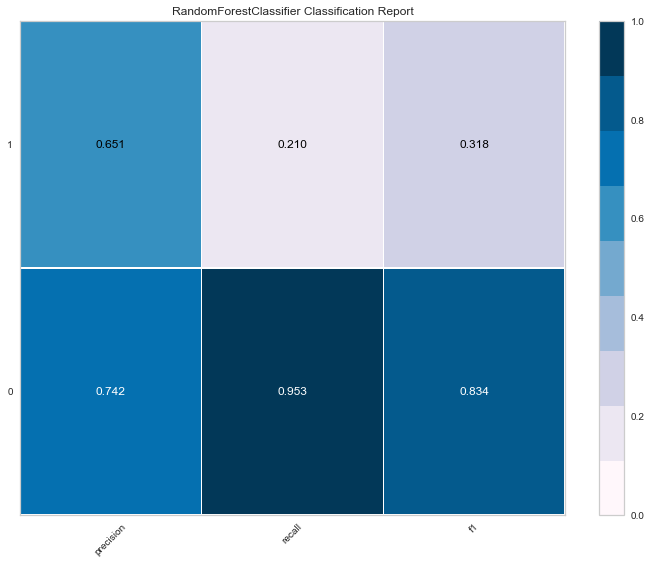

In [61]:
#Plotting our classification report
plt.figure(figsize=(10, 8))
viz = ClassificationReport(RandomForestClassifier(),cmap="PuBu")
viz.fit(X_train, y_train.values.ravel())
viz.score(X_test, y_test)
viz.finalize()
#Saving the viz
#viz.show(outpath="static/images/randomf_classifier.png")

FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

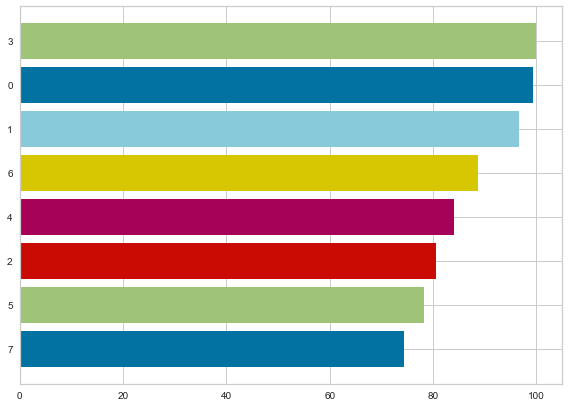

In [62]:
#Plotting our feature importance report
plt.figure(figsize=(10, 8))
viz = FeatureImportances(randomforest,size=(700, 500),color='b', align='center')
viz.fit(X_train, y_train)
#Saving the viz
#viz.show(outpath="static/images/randomf_featureimportance.png")

# SVM

In [63]:
#Setting our train, test, and split
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [64]:
#Scalling our data
# X_minmax = MinMaxScaler().fit(X_train)
# X_train_minmax = X_minmax.transform(X_train)
# X_test_minmax = X_minmax.transform(X_test)

In [65]:
#Defining model and fit
model = SVC(kernel='linear')
model.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

In [66]:
#Setting Training and Test Score
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7147087857847977
Testing Data Score: 0.7042577675489068


In [67]:
#Defining Grid
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [68]:
#Making grid fit for all fits
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [69]:
#Printing best parameters and score
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7147089947089946


In [70]:
# Training score:
grid.score(X_train, y_train)

0.7147087857847977

In [71]:
# Testing score:
grid.score(X_test, y_test)

0.7042577675489068

In [72]:
# Setting predictions
predictions = model.predict(X_test)

In [73]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
# Recall
recall = recall_score(y_test, predictions)
# Precision
precision = precision_score(y_test, predictions)
# F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：70.43%
Recall：0.00%
Precision：0.00%
F1：0.00%


C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Printing the Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       612
           1       0.00      0.00      0.00       257

    accuracy                           0.70       869
   macro avg       0.35      0.50      0.41       869
weighted avg       0.50      0.70      0.58       869



C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rpmcl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


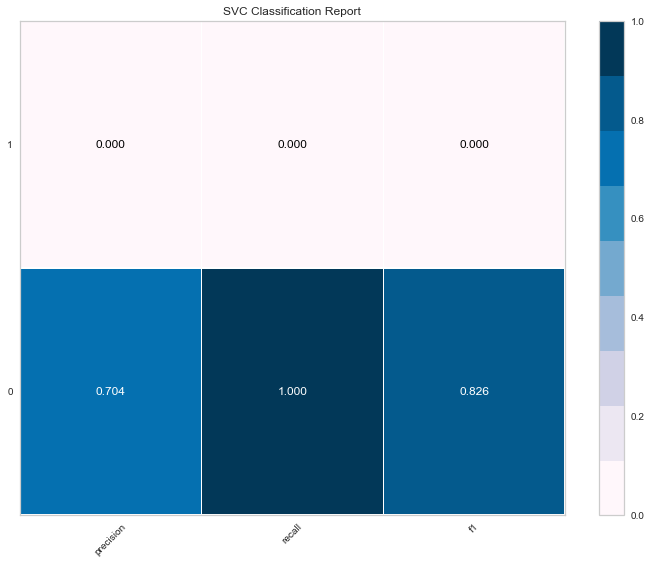

In [75]:
#Classification Viz
plt.figure(figsize=(10, 8))
viz = ClassificationReport(SVC(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
#Saving our viz
#viz.show(outpath="static/images/svm_classifier.png")

C:\Users\rpmcl\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


FeatureImportances(ax=<AxesSubplot:>, estimator=SVC(kernel='linear'))

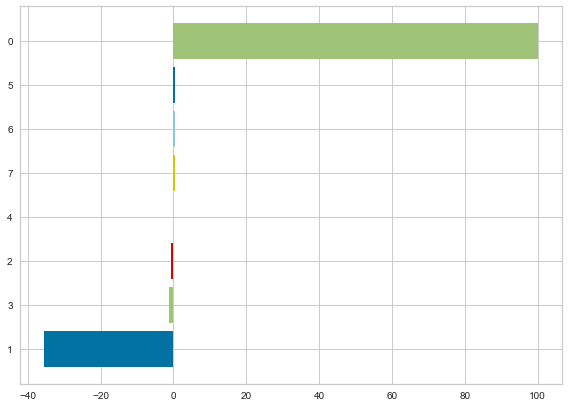

In [76]:
#Feature Importance Viz
plt.figure(figsize=(10, 8))
viz = FeatureImportances(model,size=(700, 500),color='b', align='center')
viz.fit(X_train, y_train)
#Saving our viz
#viz.show(outpath="static/images/svm_featureimportance.png")

# Neural Network

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [78]:
# Scale your data
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler().fit(X_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [79]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train.values.ravel())
encoded_y_train = label_encoder.transform(y_train.values.ravel())
encoded_y_test = label_encoder.transform(y_test.values.ravel())

In [80]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(label_encoder.classes_)

[0 1]


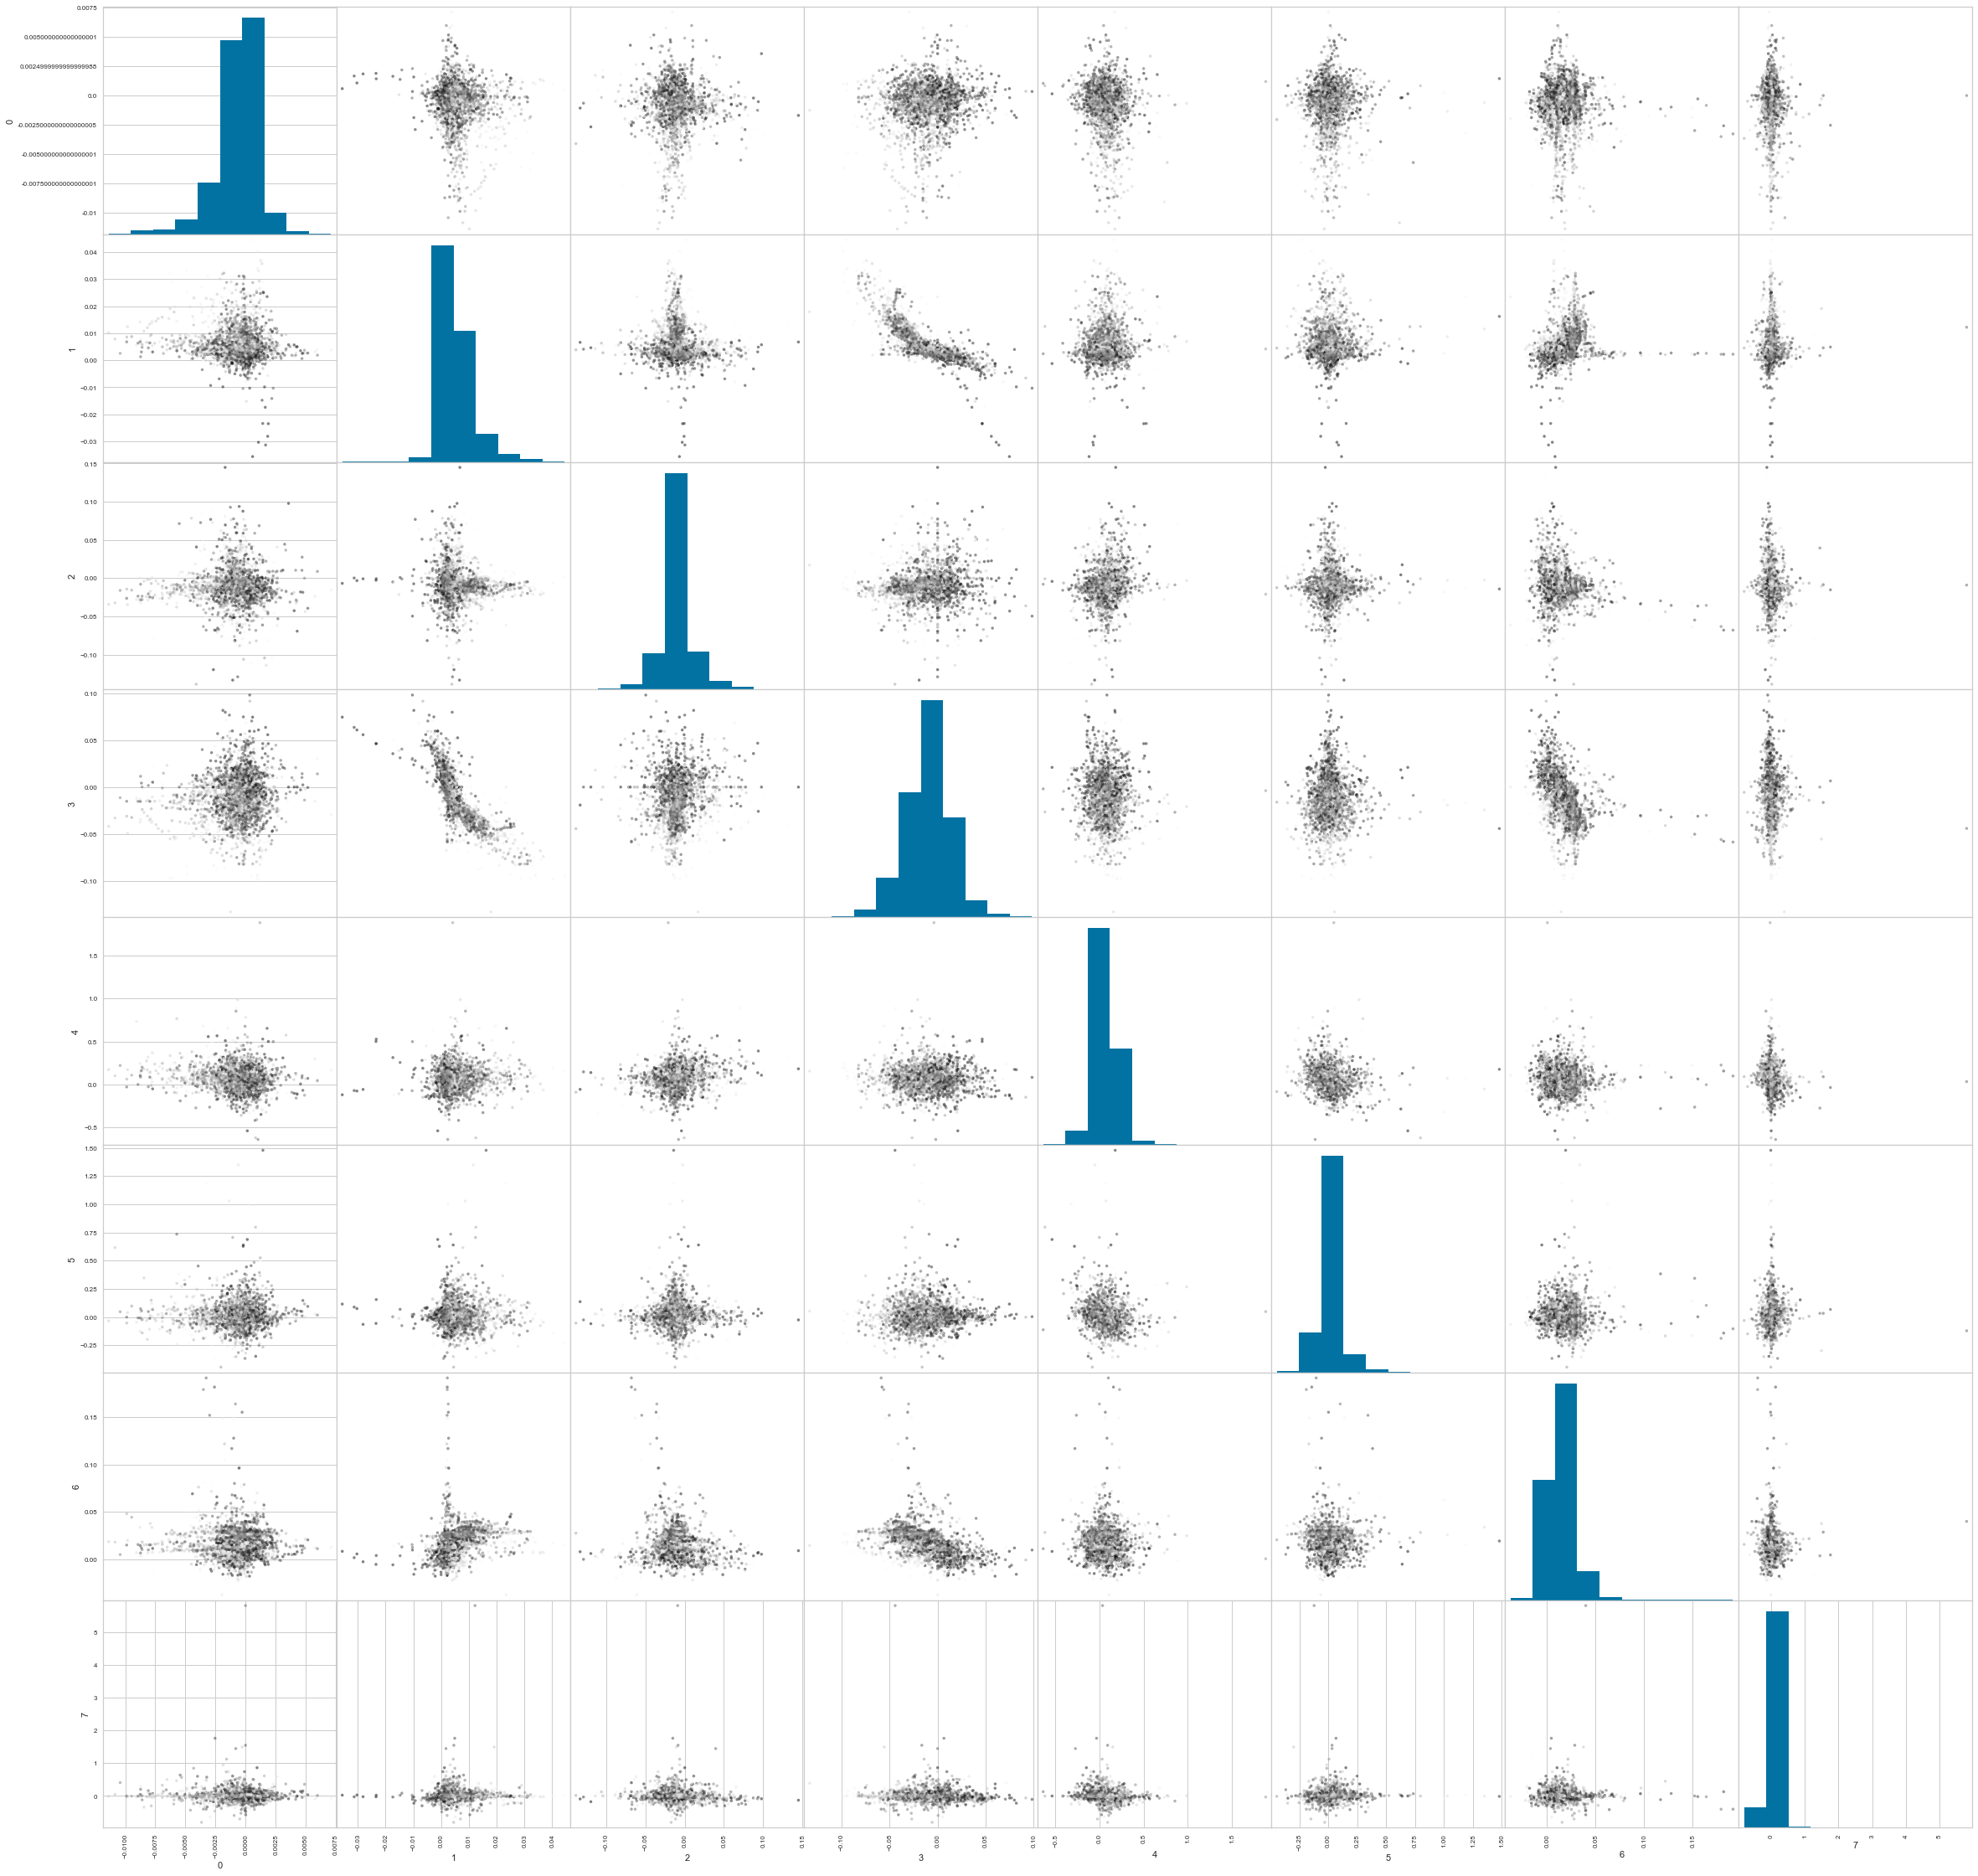

In [81]:
X_df = pd.DataFrame(X)
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
pd.plotting.scatter_matrix(X_df, c=encoded_y, figsize=(40, 40));
#Saving our viz
#plt.savefig('image_models/neuralnetwork.png')

In [82]:
X_train.shape

(2026, 8)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=8))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
#Model fitting into training data
model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
64/64 - 0s - loss: 0.6694 - accuracy: 0.6649
Epoch 2/100
64/64 - 0s - loss: 0.6243 - accuracy: 0.7147
Epoch 3/100
64/64 - 0s - loss: 0.6015 - accuracy: 0.7147
Epoch 4/100
64/64 - 0s - loss: 0.5963 - accuracy: 0.7147
Epoch 5/100
64/64 - 0s - loss: 0.5951 - accuracy: 0.7147
Epoch 6/100
64/64 - 0s - loss: 0.5944 - accuracy: 0.7147
Epoch 7/100
64/64 - 0s - loss: 0.5939 - accuracy: 0.7147
Epoch 8/100
64/64 - 0s - loss: 0.5929 - accuracy: 0.7147
Epoch 9/100
64/64 - 0s - loss: 0.5925 - accuracy: 0.7147
Epoch 10/100
64/64 - 0s - loss: 0.5918 - accuracy: 0.7147
Epoch 11/100
64/64 - 0s - loss: 0.5911 - accuracy: 0.7147
Epoch 12/100
64/64 - 0s - loss: 0.5906 - accuracy: 0.7147
Epoch 13/100
64/64 - 0s - loss: 0.5900 - accuracy: 0.7147
Epoch 14/100
64/64 - 0s - loss: 0.5895 - accuracy: 0.7147
Epoch 15/100
64/64 - 0s - loss: 0.5889 - accuracy: 0.7147
Epoch 16/100
64/64 - 0s - loss: 0.5882 - accuracy: 0.7147
Epoch 17/100
64/64 - 0s - loss: 0.5876 - accuracy: 0.7147
Epoch 18/100
64/64 - 0s

In [86]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

28/28 - 0s - loss: 0.5898 - accuracy: 0.7054
Normal Neural Network - Loss: 0.5897625088691711, Accuracy: 0.70540851354599


# Model Comparison

RF: 0.702939 (0.040528)
LR: 0.711573 (0.028225)
SVM: 0.710882 (0.028466)


<Figure size 720x576 with 0 Axes>

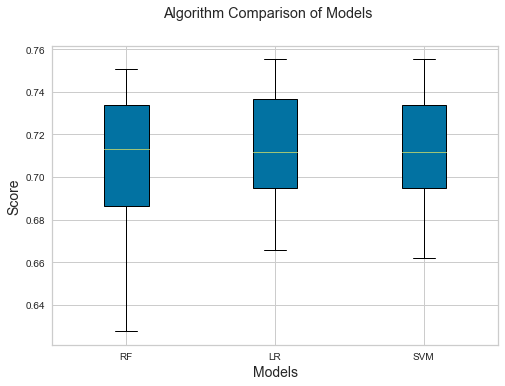

In [87]:
seed=7
#Defining our models (classifiers)
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
# models.append(('NN', Sequential()))
#Evaluating model (for loop)
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#Boxplot visualization
plt.figure(figsize=(10, 8))
fig = plt.figure()
fig.suptitle('Algorithm Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results,patch_artist=True)
ax.set_xticklabels(names)
plt.xlabel("Models",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.show()
#Saving our algorith comparison
#plt.savefig("static/images/comparison_models.png", bbox_inches = "tight")

# Final Thoughts

For this project, we decided to analyze suicide rate through a series of factores related to: demographic, economics, geographical and social. 

Our intention was to be able to predict a person who is more likely to go through suicide mortality if they have these factors in their life. We used data from various resources such as world bank, our world in data, kaggle, and WHO. The data was then cleaned through python to be able to merge all the databases together and having uniformity, as well as normalization between all variables. 

We then processed the data through machine learning using models such as : linear regression, logistic regression, random forest, and support vector machine. Of course, there were differences in accuracy because not all models are fit for this kind of purpose: prediction. Some are general models to note relationship between data and other factors such as the data not being fit for the type of model caused faults in accuracy.
        
Beyond logical reasoning, we also found research that sustaining economical factors such as unemployment, had a strong influence on the suicide mortality rate. Other factors we noticed with a strong relation was mental_substance_abuse and of course death_rate. We hope that with this research, awareness can be raised so additional funding is done in welfare-state policies that may reduce the suicide rate mortality. 

An initial correlation was made in which we discovered the following: 

**Positive correlation**
suicide_rate_owid    1.000000
death_rate           0.325633
unemployment         0.105979

**Negative correlation**
year              -0.116670
life_expectancy   -0.194228

Of course, these correlations were to be expected, nevertheless we are a little dissapointed that they are lower than 0.4, which means they are not high enough to prove a strong relationship. 

We then executed a linear model, in which we found low testing and training scores, as well as accuracy. This is because linear regressions are used for predictions (of two variables but not categorical ones), in which a logistical regression is the better fit. We also did a logistical regression in which it gaves us an accuracy of 77% for the model. We also plotted the relationship of unemployment vs suicide rate, and mental_abuse_substance vs suicide rate in scatter plots. The next model we did was a random forest, in which we also got an accuracy of 77% but we got higher precisions and recall than the logistical model. 

Other models we tested were the SVR and SVM. In the SVR we got negative test scores which means are prediction is not that great and the parameters were not a fit for the data. It is focused on continous values to know how tolerant we are of errors, while SVM is focused on classification values (like the ones we employed). In the SVM we got good testing and training scores as well as an accuracy of 77.08% and precision of 78.57%.

In conclusion, SVM, Random Forest, and the Logistical Regression were the best fit for our data and our prediction (focus of study). We believe that this is an important cause that has increased during externalities  such as the pandemic we are currently going through. Even though this is a difficult subject to bring forward (even when it comes to public policy), it is in our best interest that the awareness raised allows those found in this situation(and with the factors analyzed) to receive help.  
